## Librerías Necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pylab as pl

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn import preprocessing

import os

# Support Vector Machine | Binomial

In [2]:
heart_BI = pd.read_csv("/content/drive/MyDrive/03_Docencia/01_UNR/01_TUIA/01_MineriaDatos/01_Datasets/heart_biNomial.csv")
heart_BI.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


* Age : edad del paciente
* Sex : sexo del paciente
* exang: angina inducida por el ejercicio (1 = Sí; 0 = No)
* ca: número de conductos importantes (0-3)
* cp : Tipo de dolor en el pecho Tipo de dolor en el pecho:
  * Value 1: angina típica
  * Value 2: angina atípica
  * Value 3: dolor no anginoso
  * Value 4: asintomático
* trtbps : presión arterial en reposo (mmHg)
* chol : colesterol en mg/dl obtenido mediante el sensor de IMC
* fbs : (azúcar en sangre en ayunas > 120 mg/dl) (1 = verdadero; 0 = falso)
* rest_ecg : resultados electrocardiográficos en reposo:
  * Value 0: normal
  * Value 1: tener anomalía de la onda ST-T (inversiones de la onda T y/o elevación o depresión del ST > 0,05 mV)
  * Value 2: que muestra hipertrofia ventricular izquierda probable o definitiva según los criterios de Estes
* thalach : frecuencia cardíaca máxima alcanzada
* target :
  * 0: menos posibilidades de sufrir un ataque cardíaco
  * 1: más posibilidades de sufrir un ataque cardíaco

### Análisis descriptivo del Dataset

In [ ]:
# Obtener estadísticas descriptivas
descripcion_heart_BI = heart_BI.describe()
print(descripcion_heart_BI)

              age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

In [ ]:
# Obtener información general sobre el DataFrame
informacion_general_heart_BI = heart_BI.info()
print(informacion_general_heart_BI)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


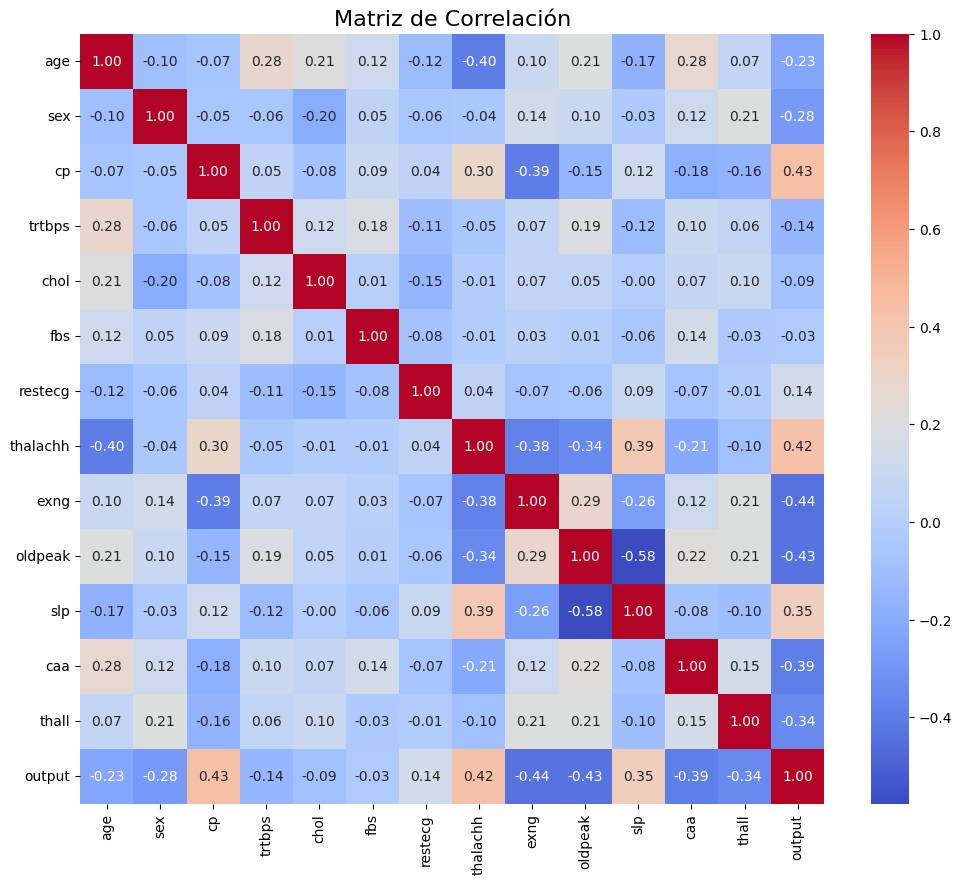

In [ ]:
# Visualizar una matriz de correlación
# Calcular la matriz de correlación
corMatrix_heart_BI = heart_BI.corr()

# Aumentar el tamaño de la figura
plt.figure(figsize=(12, 10))

# Crear el mapa de calor
sns.heatmap(corMatrix_heart_BI, annot=True, cmap='coolwarm', fmt='.2f')

# Añadir título al gráfico
plt.title('Matriz de Correlación', fontsize=16)

# Mostrar el gráfico
plt.show()

### Split

In [3]:
# Separar X e y
X_Bi = heart_BI[['age', 'chol']]
y_Bi = heart_BI['output']

x_bi_Train, x_bi_Test, y_bi_Train, y_bi_Test = train_test_split(X_Bi,
                                                                y_Bi.values.reshape(-1,1),
                                                                train_size = 0.8,
                                                                random_state = 1234,
                                                                shuffle = True)

## Definición y entrenamiento del Modelo

### Entrenaminto de todos los modelos

#### Kernel: *Linear*

In [ ]:
# Definición del Modelo
svm_classifier_linear = SVC(kernel='linear', C=1.0)

# Entrenamiento
svm_classifier_linear.fit(x_bi_Train, y_bi_Train)

# Predicciones
y_pred_linear = svm_classifier_linear.predict(x_bi_Test)

# Evaluación
accuracy = accuracy_score(y_bi_Test, y_pred_linear)
print(f"Accuracy: {accuracy * 100:.2f}%")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 68.85%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


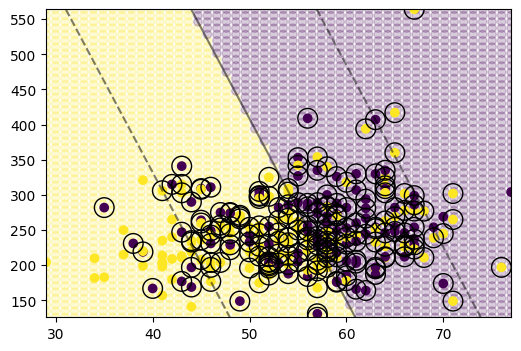

In [ ]:
x = np.linspace(np.min(x_bi_Train.age), np.max(x_bi_Train.age), 50)
y = np.linspace(np.min(x_bi_Train.chol), np.max(x_bi_Train.chol), 50)
Y, X = np.meshgrid(y, x)
grid = np.vstack([X.ravel(), Y.ravel()]).T

pred_grid = svm_classifier_linear.predict(grid)

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(grid[:,0], grid[:,1], c=pred_grid, alpha = 0.2)
ax.scatter(x_bi_Train.age, x_bi_Train.chol, c = y_bi_Train, alpha = 1)

ax.scatter(
 svm_classifier_linear.support_vectors_[:, 0],
 svm_classifier_linear.support_vectors_[:, 1],
 s=200, linewidth=1, facecolors='none', edgecolors='black')

ax.contour(X, Y, svm_classifier_linear.decision_function(grid).reshape(X.shape),
           colors = 'k', levels = [-1, 0, 1], alpha = 0.5, linestyles = ['--', '-', '--'])

#### Kernel: *Poly*

In [4]:
# Definición del Modelo
svm_classifier_poly = SVC(kernel='poly', C=1.0)

# Entrenamiento ¿
svm_classifier_poly.fit(x_bi_Train, y_bi_Train)

# Predicciones
y_pred_poly = svm_classifier_poly.predict(x_bi_Test)

# Evaluación
accuracy = accuracy_score(y_bi_Test, y_pred_poly)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 65.57%


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


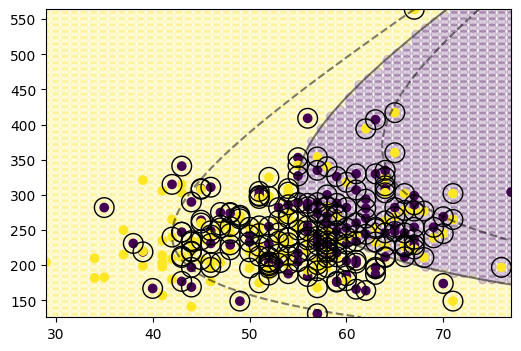

In [ ]:
x = np.linspace(np.min(x_bi_Train.age), np.max(x_bi_Train.age), 50)
y = np.linspace(np.min(x_bi_Train.chol), np.max(x_bi_Train.chol), 50)
Y, X = np.meshgrid(y, x)
grid = np.vstack([X.ravel(), Y.ravel()]).T

pred_grid = svm_classifier_poly.predict(grid)

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(grid[:,0], grid[:,1], c=pred_grid, alpha = 0.2)
ax.scatter(x_bi_Train.age, x_bi_Train.chol, c = y_bi_Train, alpha = 1)

ax.scatter(
 svm_classifier_poly.support_vectors_[:, 0],
 svm_classifier_poly.support_vectors_[:, 1],
 s=200, linewidth=1, facecolors='none', edgecolors='black')

ax.contour(X, Y, svm_classifier_poly.decision_function(grid).reshape(X.shape),
           colors = 'k', levels = [-1, 0, 1], alpha = 0.5, linestyles = ['--', '-', '--'])

#### Kernel: *rbf*

In [ ]:
# Definición del Modelo
svm_classifier_rbf = SVC(kernel='rbf', C=1.0)

# Entrenamiento ¿
svm_classifier_rbf.fit(x_bi_Train, y_bi_Train)

# Predicciones
y_pred_rbf = svm_classifier_rbf.predict(x_bi_Test)

# Evaluación
accuracy = accuracy_score(y_bi_Test, y_pred_rbf)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 57.38%


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


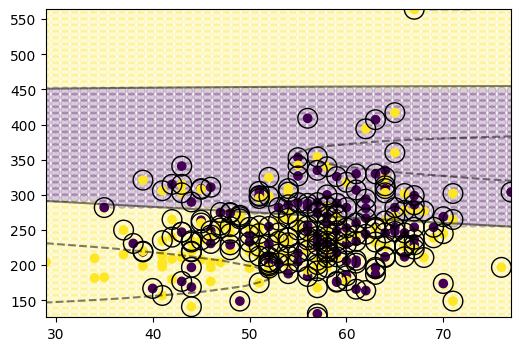

In [ ]:
x = np.linspace(np.min(x_bi_Train.age), np.max(x_bi_Train.age), 50)
y = np.linspace(np.min(x_bi_Train.chol), np.max(x_bi_Train.chol), 50)
Y, X = np.meshgrid(y, x)
grid = np.vstack([X.ravel(), Y.ravel()]).T

pred_grid = svm_classifier_rbf.predict(grid)

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(grid[:,0], grid[:,1], c=pred_grid, alpha = 0.2)
ax.scatter(x_bi_Train.age, x_bi_Train.chol, c = y_bi_Train, alpha = 1)

ax.scatter(
 svm_classifier_rbf.support_vectors_[:, 0],
 svm_classifier_rbf.support_vectors_[:, 1],
 s=200, linewidth=1, facecolors='none', edgecolors='black')

ax.contour(X, Y, svm_classifier_rbf.decision_function(grid).reshape(X.shape),
           colors = 'k', levels = [-1, 0, 1], alpha = 0.5, linestyles = ['--', '-', '--'])

#### Kernel: *sigmoid*

In [ ]:
# Definición del Modelo
svm_classifier_sigmoid = SVC(kernel='sigmoid', C=1.0)

# Entrenamiento ¿
svm_classifier_sigmoid.fit(x_bi_Train, y_bi_Train)

# Predicciones
y_pred_sigmoid = svm_classifier_sigmoid.predict(x_bi_Test)

# Evaluación
accuracy = accuracy_score(y_bi_Test, y_pred_sigmoid)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 50.82%


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


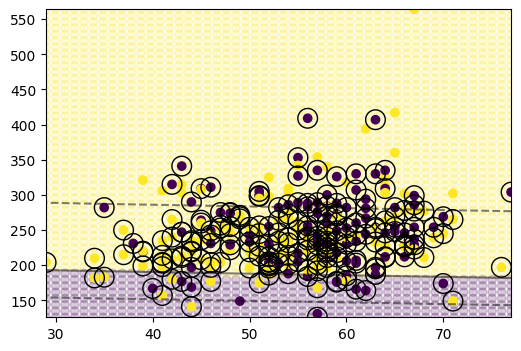

In [ ]:
x = np.linspace(np.min(x_bi_Train.age), np.max(x_bi_Train.age), 50)
y = np.linspace(np.min(x_bi_Train.chol), np.max(x_bi_Train.chol), 50)
Y, X = np.meshgrid(y, x)
grid = np.vstack([X.ravel(), Y.ravel()]).T

pred_grid = svm_classifier_sigmoid.predict(grid)

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(grid[:,0], grid[:,1], c=pred_grid, alpha = 0.2)
ax.scatter(x_bi_Train.age, x_bi_Train.chol, c = y_bi_Train, alpha = 1)

ax.scatter(
 svm_classifier_sigmoid.support_vectors_[:, 0],
 svm_classifier_sigmoid.support_vectors_[:, 1],
 s=200, linewidth=1, facecolors='none', edgecolors='black')

ax.contour(X, Y, svm_classifier_sigmoid.decision_function(grid).reshape(X.shape),
           colors = 'k', levels = [-1, 0, 1], alpha = 0.5, linestyles = ['--', '-', '--'])

# Support Vector Machine | MultiClass


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/03_Docencia/01_UNR/01_TUIA/01_MineriaDatos/01_Datasets/PhonesTrain.csv")
test = pd.read_csv("/content/drive/MyDrive/03_Docencia/01_UNR/01_TUIA/01_MineriaDatos/01_Datasets/PhonesTest.csv")

**Acerca del conjunto de datos**

La base de datos de Reconocimiento de Actividad Humana se construyó a partir de grabaciones de 30 participantes del estudio que realizaban actividades de la vida diaria (AVD) mientras llevaban un teléfono inteligente montado en la cintura con sensores inerciales integrados.

El objetivo es clasificar las actividades en una de las seis actividades realizadas.

*Descripción del experimento*

Los experimentos se han llevado a cabo con un grupo de 30 voluntarios de entre 19 y 48 años. Cada persona realizó seis actividades:
* CAMINAR
* CAMINAR_ARRIBA
* CAMINAR_ABAJO
* SENTADO
* DE PIE
* Tumbado

Llevando un teléfono inteligente (Samsung Galaxy S II) en la cintura. Usando su acelerómetro y giroscopio integrados, capturamos una aceleración lineal de 3 ejes y una velocidad angular de 3 ejes a una velocidad constante de 50 Hz. Los experimentos han sido grabados en vídeo para etiquetar los datos manualmente. El conjunto de datos obtenido se dividió aleatoriamente en dos conjuntos, donde se seleccionó el 70% de los voluntarios para generar los datos de entrenamiento y el 30% los datos de prueba.

Las señales de los sensores (acelerómetro y giroscopio) fueron preprocesadas aplicando filtros de ruido y luego muestreadas en ventanas deslizantes de ancho fijo de 2,56 segundos y 50% de superposición (128 lecturas/ventana). La señal de aceleración del sensor, que tiene componentes gravitacionales y de movimiento corporal, se separó mediante un filtro de paso bajo de Butterworth en aceleración corporal y gravedad. Se supone que la fuerza gravitacional tiene sólo componentes de baja frecuencia, por lo que se utilizó un filtro con una frecuencia de corte de 0,3 Hz. De cada ventana, se obtuvo un vector de características calculando variables del dominio del tiempo y la frecuencia.

*Información de atributos*

Para cada registro del conjunto de datos se proporciona lo siguiente:

* Aceleración triaxial del acelerómetro (aceleración total) y aceleración corporal estimada.
* Velocidad angular triaxial del giroscopio.
* Un vector de 561 características con variables en el dominio del tiempo y la frecuencia.
* Etiqueta de actividad.

In [ ]:
print(train.shape)
print(train.columns)

(7352, 563)
Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)


In [ ]:
print("Valores faltantes en el Train Dataset:",train.isnull().values.any())
print("Valores faltantes en el Test Dataset:",test.isnull().values.any(), "\n")

Valores faltantes en el Train Dataset: False
Valores faltantes en el Test Dataset: False 



In [ ]:
# Distribución de las Clases
train_outcome = pd.crosstab(index=train["Activity"],
                            columns="count")

train_outcome

col_0,count
Activity,
LAYING,1407
SITTING,1286
STANDING,1374
WALKING,1226
WALKING_DOWNSTAIRS,986
WALKING_UPSTAIRS,1073


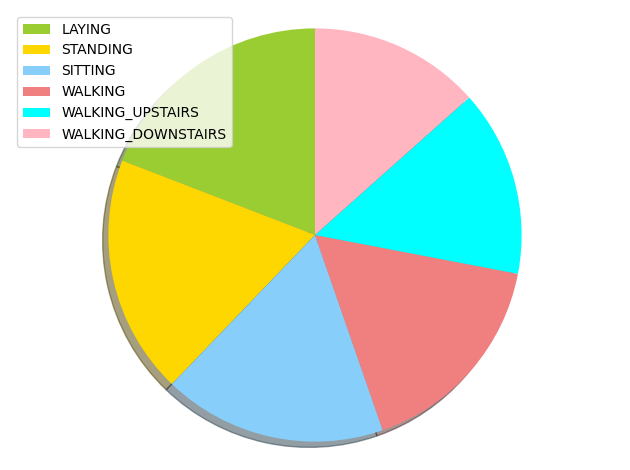

In [ ]:
# Ploteo distribución de "Output"
temp = train["Activity"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })

labels = df['labels']
sizes = df['values']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','cyan','lightpink']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train = pd.DataFrame(train.drop(['Activity','subject'],axis=1))
Y_train_label = train.Activity.values.astype(object)
X_test = pd.DataFrame(test.drop(['Activity','subject'],axis=1))
Y_test_label = test.Activity.values.astype(object)

# Dimension of Train and Test set
print("Dimensión del Train set",X_train.shape)
print("Dimensión del Test set",X_test.shape,"\n")

Dimensión del Train set (7352, 561)
Dimensión del Test set (2947, 561) 



In [ ]:
# Transformar las etiquetas en números
encoder = preprocessing.LabelEncoder()

#Train
encoder.fit(Y_train_label)
Y_train = encoder.transform(Y_train_label)

#Test
encoder.fit(Y_test_label)
Y_test = encoder.transform(Y_test_label)

# Total de variables continuas y categóricas del Train set
num_cols = X_train._get_numeric_data().columns
print("Variables numéricas:",num_cols.size)
names_of_predictors = list(X_train.columns.values)

Variables numéricas: 561


In [ ]:
# Estandarización
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Parámetros del Gridsearch
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                'C': [1, 10, 100, 1000]},
                 {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [ ]:
# Aplicar GS para elegir los mejores hiperparámetros
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train_scaled, Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [ ]:
# Mejor modelo
print('C:',svm_model.best_estimator_.C,"\n")
print('Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Gamma:',svm_model.best_estimator_.gamma,"\n")
print('Métricas:', svm_model.best_score_,"\n")

C: 1000 

Kernel: rbf 

Gamma: 0.0001 

Métricas: 0.938255432696532 



In [ ]:
# Predicciones
final_model = svm_model.best_estimator_
Y_pred = final_model.predict(X_test_scaled)
Y_pred_label = list(encoder.inverse_transform(Y_pred))

In [ ]:
# M. Confusión
print(confusion_matrix(Y_test_label,Y_pred_label))
print("\n")
print(classification_report(Y_test_label,Y_pred_label))

print("Training set score for SVM: %f" % final_model.score(X_train_scaled , Y_train))
print("Testing  set score for SVM: %f" % final_model.score(X_test_scaled  , Y_test ))

svm_model.score

[[537   0   0   0   0   0]
 [  0 436  54   0   0   1]
 [  0  15 517   0   0   0]
 [  0   0   0 493   3   0]
 [  0   0   0   5 398  17]
 [  0   0   0  16   2 453]]


                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.89      0.93       491
          STANDING       0.91      0.97      0.94       532
           WALKING       0.96      0.99      0.98       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.96      0.96      0.96       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947

Training set score for SVM: 0.996872
Testing  set score for SVM: 0.961656


<bound method BaseSearchCV.score of GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])>